In [9]:
import numpy as np
from matplotlib import pyplot as plt

import sys, os, glob, re

from scipy.optimize import curve_fit

In [10]:
mypath = "/eos/project/i/insulab-como/datiVari/202301_simulPMG_PbWO4"

# Ottengo i tempi di modifica
lstTempi = np.sort(np.array([os.path.getmtime(x) for x in glob.glob(os.path.join(mypath, "*_*.dat"))]))

# Tempi del primo ed ultimo file
startTime = lstTempi.min()
endTime = lstTempi.max()

# Delta time
durata = endTime - startTime

print(f"Sono stati raccolti {lstTempi.shape[0]} dati in {durata/60/60:.2f} h\nUna media di {lstTempi.shape[0]/durata:.2f} al secondo, ovvero un dato ogni {durata/lstTempi.shape[0]:.2f} secondi")

Sono stati raccolti 5932 dati in 53.91 h
Una media di 0.03 al secondo, ovvero un dato ogni 32.72 secondi


(5932,)


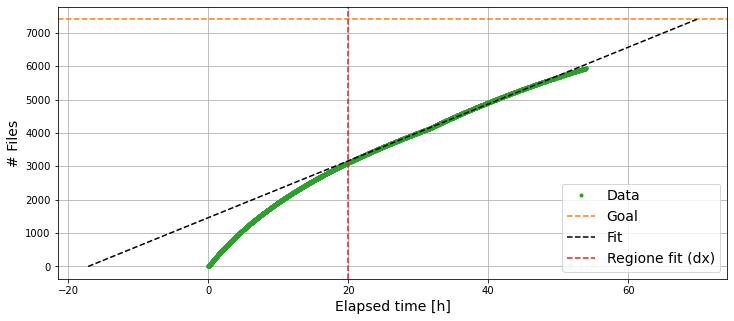

Per produrre 7400 files, se il mondo fosse lineare, ci vogliono 69.80 ore, ovvero ancora 15.89 ore


In [12]:
# How many files
y = np.arange(1, lstTempi.shape[0]+1 )
print(y.shape)

# Numero di files da produrre
myThr = 7400

yall = np.arange(1, myThr + 1)

# Tempo in ore
x = (lstTempi - startTime)/60/60 # h


def myline(x, m, q):
    return m*x+q



# Fitto la retta al contrario, così posso trovare il tempo per 7400 files
startFit = 40 # ore
cond = x > startFit # Sto fittando solo da 20h in su
popt, pcov = curve_fit(myline, y[cond], x[cond])


fig, ax = plt.subplots()
fig.set_size_inches(12,5)

ax.plot(x, y, ls = "", marker = ".", c = "tab:green", label = "Data")
ax.axhline(y = myThr, ls = "--", c = "tab:orange", label = "Goal")

ax.plot(myline(yall, *popt), yall, ls = "--", c = "k", label = "Fit")
ax.axvline(x = startFit, ls = "--", c ="tab:red", label = "Regione fit (dx)")

ax.grid()
ax.legend(fontsize = 14)

ax.set_xlabel("Elapsed time [h]", fontsize = 14)
ax.set_ylabel("# Files", fontsize = 14)


plt.show()

print(f"Per produrre {myThr} files, se il mondo fosse lineare, ci vogliono {myline(myThr, *popt):.2f} ore, ovvero ancora {myline(myThr, *popt) - durata/60/60:.2f} ore")

In [13]:
from datetime import datetime
now = datetime.now()

print(f"Last sync: {now.strftime('%Y-%m-%d %H:%M:%S')}")

Last sync: 2023-01-25 17:10:22
